In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

2022-05-25 21:39:28.422555: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-25 21:39:28.422587: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data = pd.read_csv('NSE-Tata_Global_Beverages_Limited.csv')
dataset_train=data.iloc[0:930,1:2]
dataset_test=data.iloc[930:,1:2]
training_set = data.iloc[0:930, 1:2].values
testing_set=data.iloc[930:,1:2].values
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
data.drop('Last', axis=1, inplace=True)
data.drop('Total Trade Quantity', axis=1, inplace=True)
data.drop('Turnover (Lacs)', axis=1, inplace=True)
print(data.head())
data.to_csv('tata_preprocessed.csv',index= False)
data = data.iloc[::-1]

         Date    Open    High     Low   Close
0  2018-10-08  208.00  222.25  206.85  215.15
1  2018-10-05  217.00  218.60  205.90  209.20
2  2018-10-04  223.50  227.80  216.15  218.20
3  2018-10-03  230.00  237.50  225.75  227.60
4  2018-10-01  234.55  234.60  221.05  230.90


In [4]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

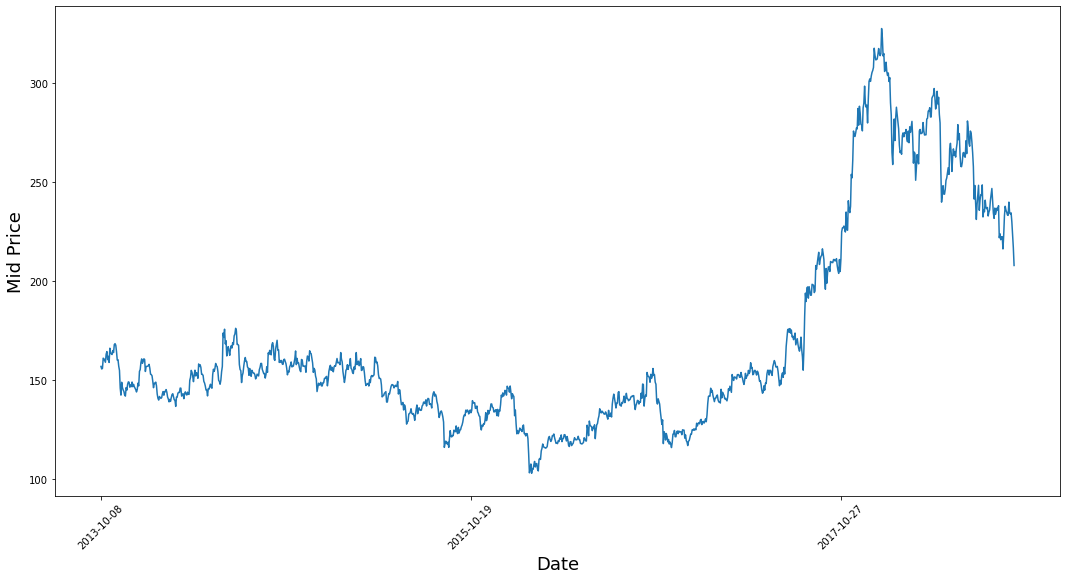

In [5]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Open']))
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []
for i in range(10,930):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
regressor = Sequential()

regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 200, batch_size = 64)

2022-05-25 21:39:45.810294: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-25 21:39:45.810331: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-25 21:39:45.810360: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (harsh-HP-ProDesk-600-G1-SFF): /proc/driver/nvidia/version does not exist
2022-05-25 21:39:45.810571: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
15/15 [==============================] - 5s 20ms/step - loss: 0.0704
Epoch 2/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0095
Epoch 3/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0050
Epoch 4/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0044
Epoch 5/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0036
Epoch 6/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0037
Epoch 7/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0027
Epoch 8/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0031
Epoch 9/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0031
Epoch 10/200
15/15 [==============================] - 0s 20ms/step - loss: 0.0031
Epoch 11/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0032
Epoch 12/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0029
Epoch 13/200
15/15 [=====

15/15 [==============================] - 0s 18ms/step - loss: 0.0016
Epoch 102/200
15/15 [==============================] - 0s 17ms/step - loss: 0.0016
Epoch 103/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0016
Epoch 104/200
15/15 [==============================] - 0s 17ms/step - loss: 0.0016
Epoch 105/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0017
Epoch 106/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0017
Epoch 107/200
15/15 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 108/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0014
Epoch 109/200
15/15 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 110/200
15/15 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 111/200
15/15 [==============================] - 0s 19ms/step - loss: 0.0020
Epoch 112/200
15/15 [==============================] - 0s 19ms/step - loss: 0.0019
Epoch 113/200
15/1

15/15 [==============================] - 0s 23ms/step - loss: 0.0011
Epoch 200/200
15/15 [==============================] - 0s 19ms/step - loss: 0.0011


In [10]:
real_stock_price = testing_set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10,305):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

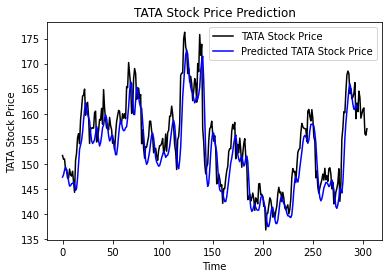

In [12]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()